### Analysis

- A study of the effectiveness on the tumor, Squamous cell carcinoma (SCC) with various drug regimens was studied.
- The paramaters of the experiment were to observe the tumor growth over a 45 day period, use nine different drug regimens with one placebo, experiment on 249 mice, roughly split 50/50 between male and female.
- After analyzing all of the the regimens over a 45 day period, two drugs, Capomulim and Ramicane, were the most successful in reducing the size of the tumor. 
- When analyzing between Capomulin and Ramicane, Capomuline and a slightly higher number of timepoints and the size of the tumor shrank slightly more when looking at the various graphs below. 
- The data indicated that the mice whom were treated with Capomulin, the volume of the tumor peaked at day 20 and decreased in size roughly 7mm3 by the end of the 45 day observation period shown in the line graph representing the tumor volume and point in time.
- Finally, there was also a fairly high and positive correlation between the weight of the mouse and the size of the tumor. This was indicated in the in the calculation and had a Pearson Correlation Coefficient of 0.84 which the bounds are 1 to -1. Furthermore, the regression graph concluded the same with an R-Squared value of 0.71. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
#Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
#Read the study results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [6]:
# Display the data table for preview
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice
merged_data_df["Mouse ID"].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id = merged_data_df.loc[merged_data_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID which is g989
duplicate_mice = merged_data_df[merged_data_df["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data_df[(merged_data_df["Mouse ID"]!="g989")]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice in the clean DataFrame
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# use mean function to find mean
mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Use median function for median
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Use var function for variance
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# use std function for standard deviation
standard_deviation = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Use sem function to find SEM
SEM = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# # Assemble the resulting series into a single summary DataFrame.
statistics_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": SEM
})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Using the aggregation method, produce the same summary statistics in a single line.
stats_df = statistics_df.aggregate
stats_df

<bound method DataFrame.aggregate of                    Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398>

Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

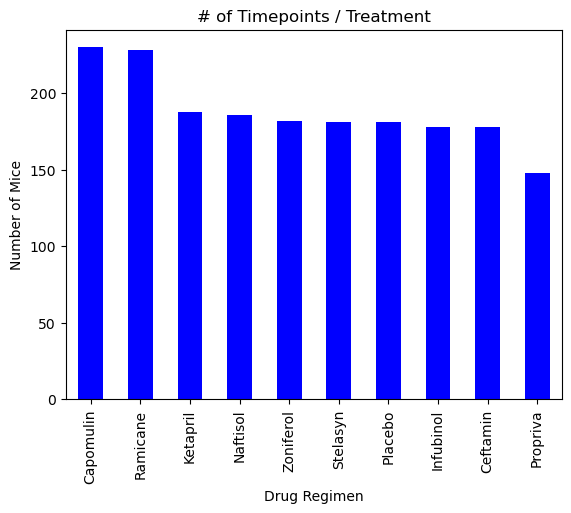

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
stats_chart = cleaned_df["Drug Regimen"].value_counts()
stats_chart.plot.bar(x="Drug Reginem", color="blue", title="# of Timepoints / Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

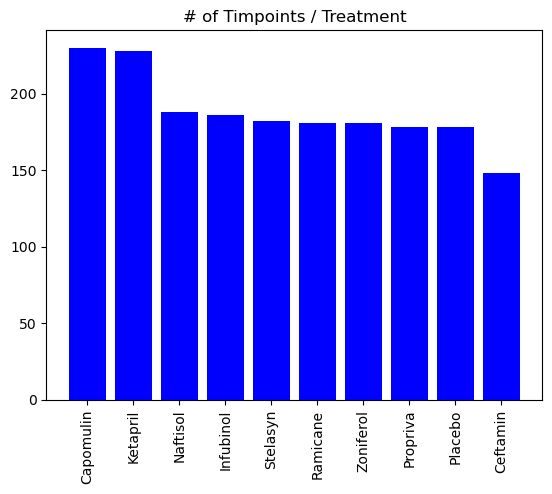

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
experiment = cleaned_df["Drug Regimen"].unique()
num_of_experiments = cleaned_df["Drug Regimen"].value_counts()

plt.bar(experiment,num_of_experiments, color="blue", align = "center")
plt.title("# of Timpoints / Treatment")
plt.xticks(rotation = "vertical")

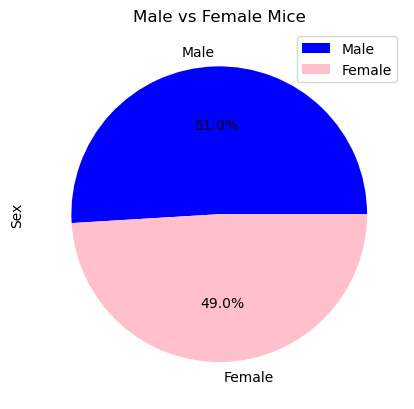

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data_df = pd.DataFrame(cleaned_df["Sex"].value_counts())
colors = ["blue", "pink"]
gender_data_df.plot.pie(y="Sex", autopct = "%1.1f%%", colors = colors)
plt.title("Male vs Female Mice")
plt.show()


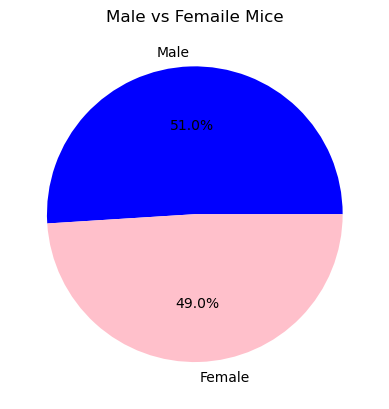

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "pink"]
numbers = [51.0, 49.0]

plt.pie(numbers, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male vs Femaile Mice")
plt.show()

Quartiles, Outliers, and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
                            
# Start by getting the last (greatest) timepoint for each mouse
final_data = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
final_data = final_data.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_data = pd.merge(final_data, cleaned_df, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'],how="inner")
final_merged_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

# Four treatments: Capomulin, Ramicane, Infubinol, Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_vol_data = final_merged_data.loc[final_merged_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_data_list.append(tumor_vol_data)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr),1)
    upper_bound = round(upperq + (1.5*iqr),1)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound)|(tumor_vol_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


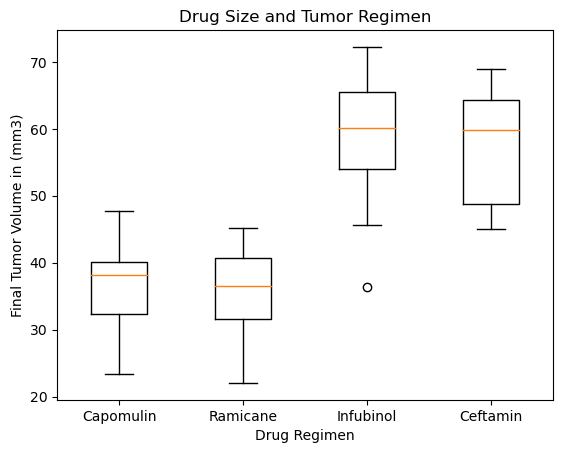

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = tumor_data_list
fig1, ax1 = plt.subplots()
ax1.set_title("Drug Size and Tumor Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume in (mm3)")

ax1.boxplot(data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

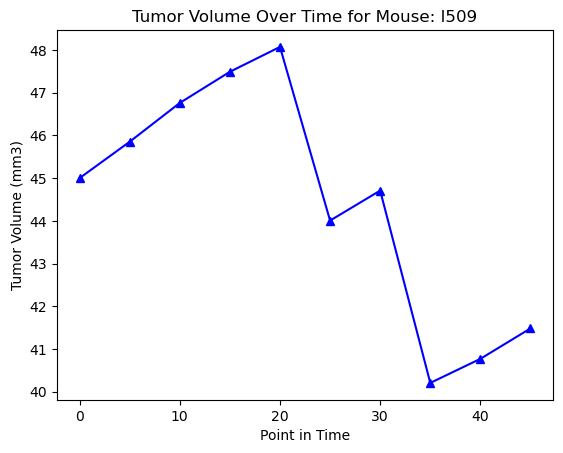

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mouse = merged_data_df.loc[(merged_data_df["Mouse ID"]== "l509")]

x_axis = cap_mouse["Timepoint"]
y_axis = cap_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Tumor Volume Over Time for Mouse: l509")
plt.plot(x_axis, y_axis, marker="^", color="blue")
plt.xlabel("Point in Time")
plt.ylabel("Tumor Volume (mm3)")

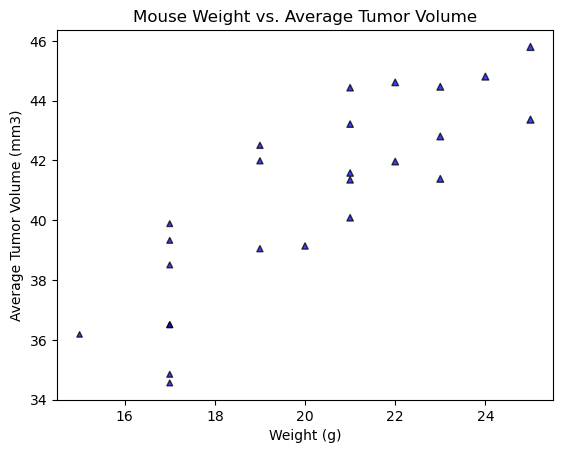

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_data = merged_data_df[(merged_data_df["Drug Regimen"]== "Capomulin")]
avg_data = pd.DataFrame(scat_data).groupby(scat_data["Mouse ID"]).mean()
x_axis = avg_data["Weight (g)"]
y_axis = avg_data["Tumor Volume (mm3)"]
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.scatter(x_axis, y_axis, marker="^", facecolors="blue", edgecolors="black",s=x_axis, alpha=0.75)


Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r^squared is: 0.71


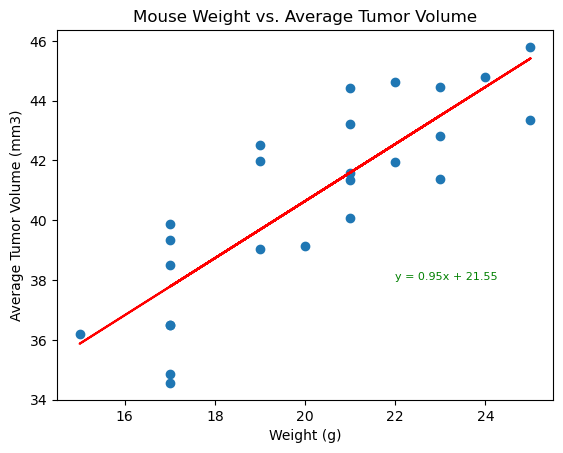

In [29]:
x_values = avg_data["Weight (g)"]
y_values = avg_data["Tumor Volume (mm3)"]
(slope, intercept, r_value, p_value, std_dev) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(22,38),fontsize=8,color="green")
print(f"The r^squared is: {round(r_value**2,2)}")
plt.show()
